# Problem 3: Random Matrix Multiplication

## (a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [2]:
from numba import jit
import time
from tabulate import tabulate

In [6]:
class RandomMatrixMultiplication(): 
    """
    Implements Algorithm 2 dicussed in lecture to get a matrix M (mxp) from matrices A (mxn) and B (nxp).  
    """
    def __init__(self, A: np.ndarray, B: np.ndarray, r: int,seed: int = None):
        """
        Inputs:
        - A: (m x n) matrix
        - B: (n x p) matrix
        - r: number of samples (positive integer)
        - p: probability vector of length n, summing to 1
        """

        if seed is not None:
            np.random.seed(seed)

        m, n = A.shape
        n_B, p = B.shape

        # Make sure that the shape of the matrices match the required inputs and r postive integer 
        if n != n_B:
            raise ValueError(f"Wrong matrix dimension: A.shape = {A.shape}, B.shape = {B.shape}")
        if r <= 0 or not isinstance(r, int):
            raise ValueError("r must be a positive integer")
 
        self.A = A 
        self.B = B
        self.r = r 
        self.m = m 
        self.n = n 
        self.p = p
        self.probabilities = self.compute_optimal_probabilities()

    def compute_optimal_probabilities(self) -> np.ndarray:
        """
        We use non-uniform sampling explained on slide 19 of lectures
        """
        probs = np.array([
            np.linalg.norm(self.A[:,k]) * np.linalg.norm(self.B[k,:])
            for k in range(self.n) 
        ]) 

        probs_sum = probs.sum()        

        if np.isclose(probs_sum, 0):
            raise ValueError("probs must sum to 1")

        return probs / probs_sum


    def sample_indices(self) -> np.ndarray:
        """
        This method will sample r indices i1,...,ir which are elements of {0,...,n-1} iid with probablity p{il =k } = pk because python uses indexing. This is a minor deviation from the slides. 
        """
        return np.random.choice(self.n, size = self.r, replace = True, p = self.probabilities)

    def compute(self) -> np.ndarray:
        """
        actually do the approximation to get the matrix M
        """
        M = np.zeros((self.m, self.p)) # Intialize blank matrix
        indices = self.sample_indices()

        for i in indices: 
            A_col = self.A[:, i].reshape(self.m,1) # (m,1)
            B_row = self.B[i, :].reshape(1, self.p) # (1,p)
            M += (1 / self.probabilities[i]) * ( A_col @ B_row)

        M /= self.r 
        return M    

    

## (b)

In [7]:
A = pd.read_csv('/Users/shawheennaderi/Downloads/STA243_homework_1_matrix_A.csv', header= None)
B = pd.read_csv('/Users/shawheennaderi/Downloads/STA243_homework_1_matrix_B.csv', header= None) 


In [8]:
A.head() 

0         1         2         3         4         5         6    \
0 -0.800480 -0.329177  0.103353 -0.018531  0.002838 -0.010551 -0.011502   
1 -0.801043 -0.336112  0.099090 -0.013168  0.000177 -0.016628 -0.022699   
2 -0.803743 -0.339797  0.094645 -0.010898  0.005788 -0.023203 -0.026142   
3 -0.802690 -0.350839  0.096107 -0.006296  0.007464 -0.029483 -0.035822   
4 -0.804327 -0.352577  0.095047 -0.001811  0.004306 -0.037019 -0.043150   

        7         8         9    ...       630       631       632       633  \
0  0.010476 -0.020270  0.010784  ... -0.005590  0.004768  0.005219  0.000018   
1  0.003273 -0.016879  0.007710  ... -0.000374 -0.005361 -0.004005  0.006184   
2  0.010232 -0.025073  0.003671  ... -0.004113 -0.000930  0.007052  0.003261   
3  0.008655 -0.034238  0.003212  ...  0.006653 -0.003343  0.001846 -0.002530   
4  0.007665 -0.039932  0.005597  ...  0.000135 -0.002029  0.003112 -0.005566   

        634       635       636       637       638       639  
0  0.004461 -0.002748  0.002671  0.002591 -0.001175 -0.000957  
1  0.003463  0.005827  0.006397  0.005781  0.003978  0.005223  
2 -0.004887 -0.000068 -0.004359 -0.000258 -0.001331 -0.003981  
3 -0.000604  0.002890  0.002194 -0.000359  0.003082  0.000667  
4 -0.003138 -0.004095 -0.004899 -0.006115  0.001075  0.001884  

[5 rows x 640 columns]

In [9]:
M_true = A @ B

In [10]:
M_true.head()

0         1         2         3         4         5         6    \
0  0.764706  0.741176  0.729412  0.749020  0.788235  0.815686  0.811765   
1  0.768627  0.768627  0.776471  0.796078  0.819608  0.815686  0.792157   
2  0.839216  0.839216  0.835294  0.831373  0.827451  0.811765  0.796078   
3  0.796078  0.803922  0.807843  0.800000  0.776471  0.749020  0.725490   
4  0.725490  0.756863  0.792157  0.800000  0.780392  0.741176  0.709804   

        7         8         9    ...       630       631       632       633  \
0  0.800000  0.819608  0.796078  ...  0.843137  0.847059  0.843137  0.823529   
1  0.768627  0.788235  0.792157  ...  0.843137  0.843137  0.843137  0.823529   
2  0.780392  0.803922  0.835294  ...  0.843137  0.843137  0.843137  0.823529   
3  0.713725  0.698039  0.701961  ...  0.843137  0.843137  0.839216  0.823529   
4  0.694118  0.745098  0.686275  ...  0.843137  0.839216  0.839216  0.819608   

        634       635       636       637       638       639  
0  0.807843  0.807843  0.800000  0.780392  0.760784  0.749020  
1  0.807843  0.807843  0.800000  0.780392  0.760784  0.752941  
2  0.807843  0.807843  0.803922  0.784314  0.764706  0.752941  
3  0.807843  0.807843  0.803922  0.784314  0.764706  0.756863  
4  0.807843  0.807843  0.803922  0.784314  0.768627  0.756863  

[5 rows x 640 columns]

In [11]:
r_values = [20, 50, 100, 200]
approximations = {}

# Convert pandas to numpy 
A = np.array(A)
B = np.array(B)

for r in r_values:
    print(f"\nRunning r = {r}...")
    rmm = RandomMatrixMultiplication(A, B, r=r, seed=42)
    M_approx = rmm.compute()
    approximations[r] = M_approx



Running r = 20...

Running r = 50...

Running r = 100...

Running r = 200...


## (c)

In [12]:
norm_A = np.linalg.norm(A, ord='fro')
norm_B = np.linalg.norm(B, ord='fro')
denominator = norm_A * norm_B

results = []

for r in r_values:
    M_approx = approximations[r]
    numerator = np.linalg.norm(M_approx - M_true, ord='fro')
    relative_error = numerator / denominator
    results.append({"r": r, "Relative Error": relative_error})

In [13]:
df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

  r  Relative Error
 20        0.203035
 50        0.155827
100        0.094211
200        0.074369


## (d)

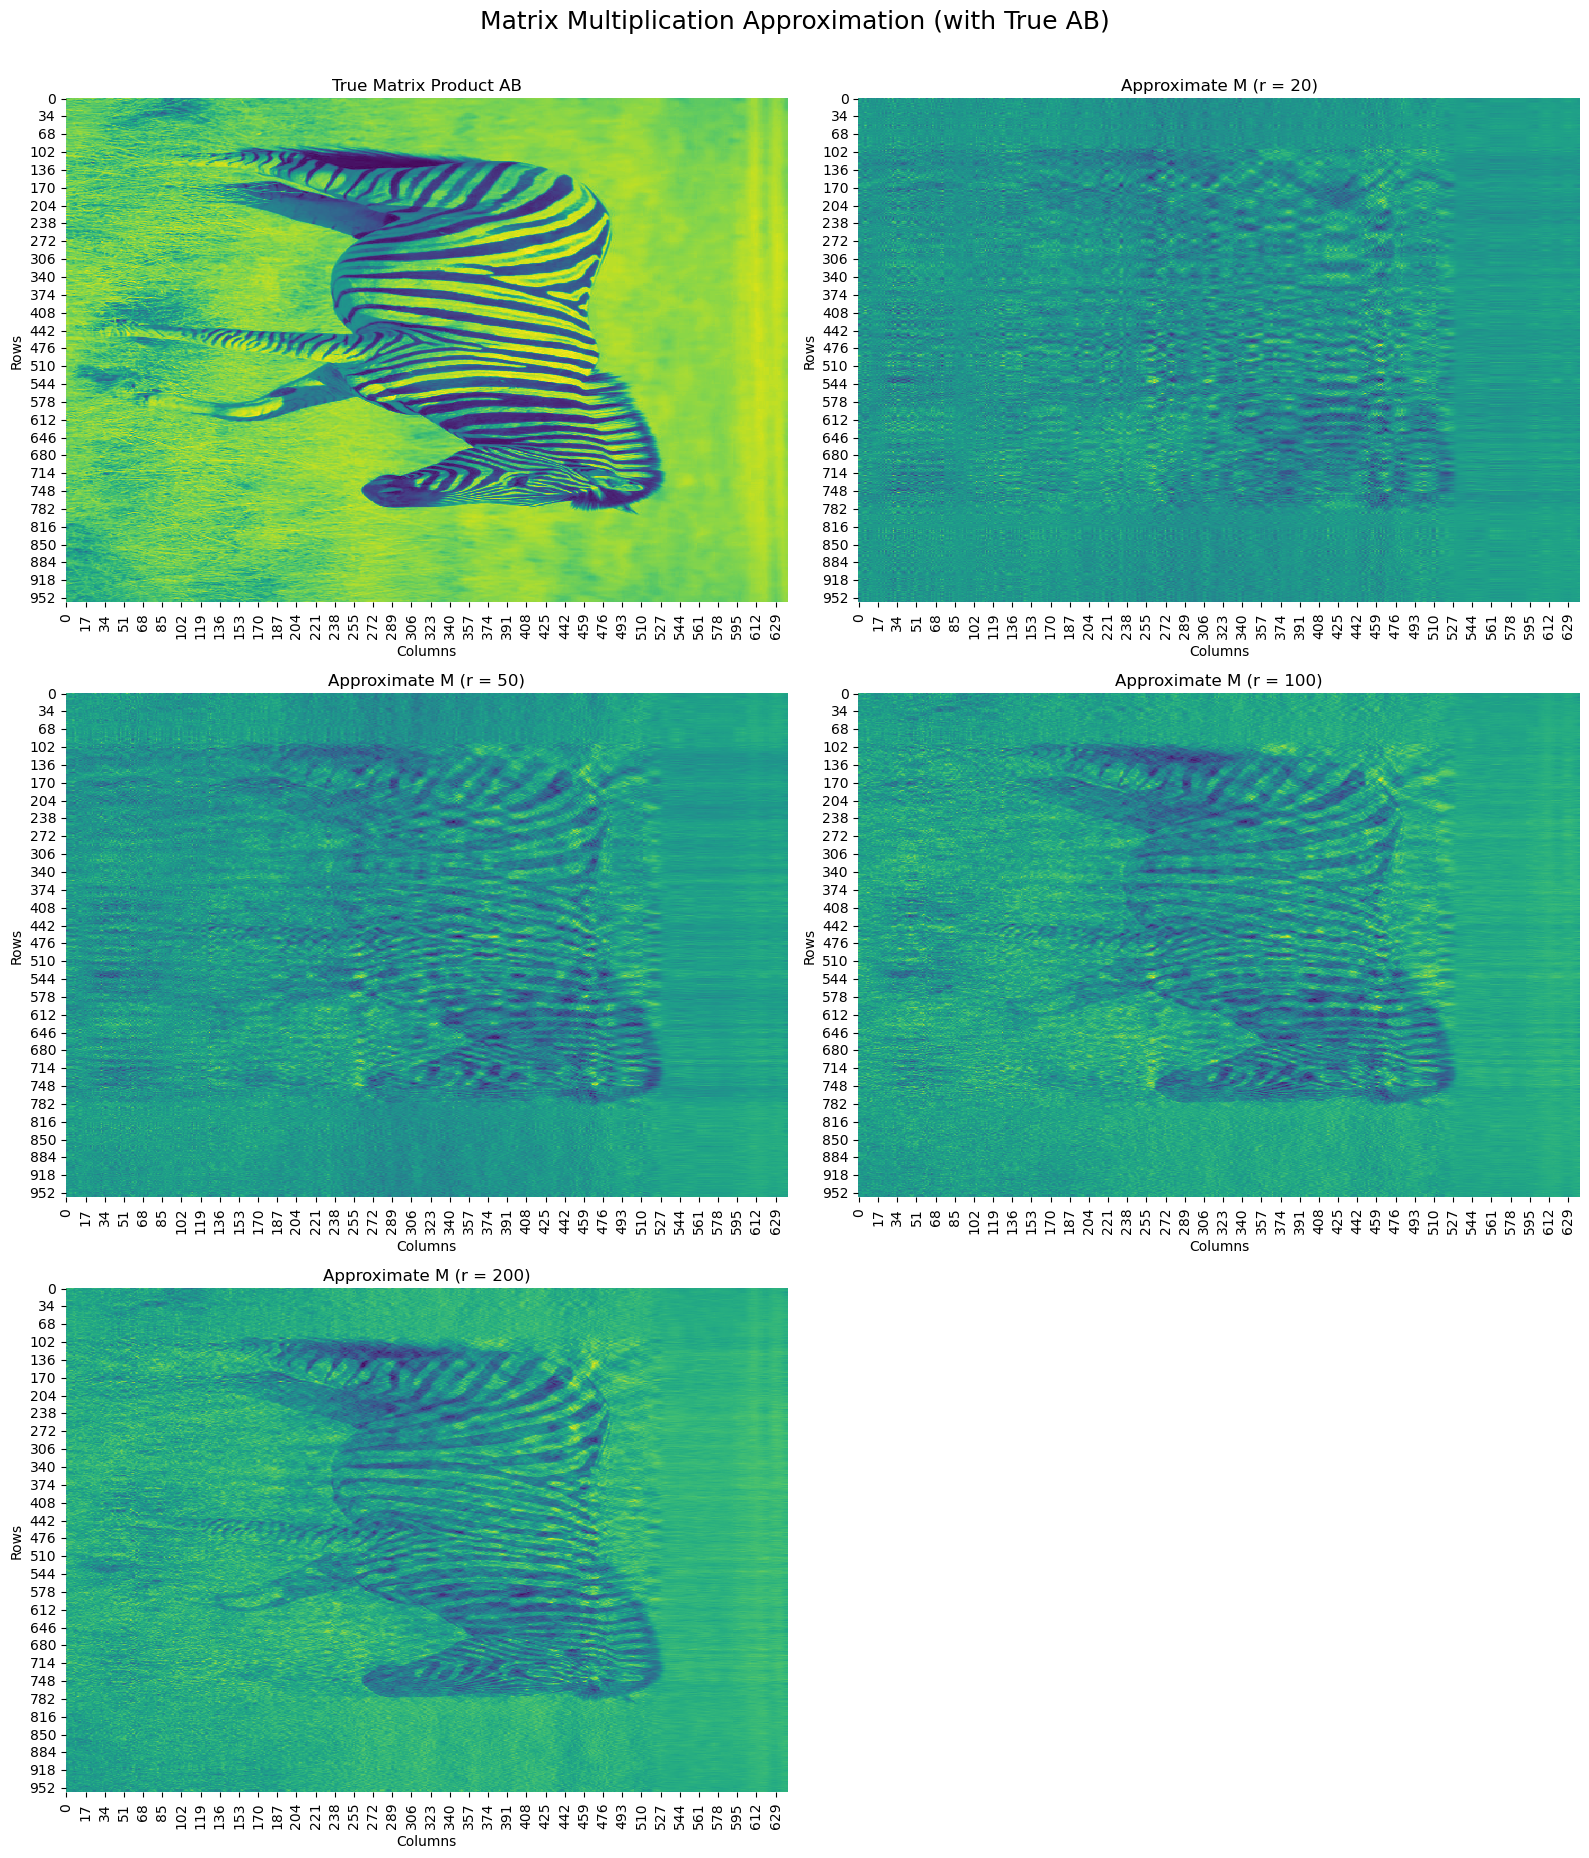

In [14]:
plt.figure(figsize=(16, 18))


plt.subplot(3, 2, 1)
sns.heatmap(M_true, cmap='viridis', cbar=False)
plt.title("True Matrix Product AB")
plt.xlabel("Columns")
plt.ylabel("Rows")


for i, r in enumerate(r_values):
    plt.subplot(3, 2, i+2)  # start from slot 2
    sns.heatmap(approximations[r], cmap='viridis', cbar=False)
    plt.title(f"Approximate M (r = {r})")
    plt.xlabel("Columns")
    plt.ylabel("Rows")

plt.tight_layout()
plt.suptitle("Matrix Multiplication Approximation (with True AB)", fontsize=18, y=1.03)
plt.show()


# Problem 4

In [93]:
def power_iteration(A, v0, eps = 1e-6, maxiter=100):
    """
    Please implement the function power_iteration that takes in the matrix X and
    initial vector v0 and returns the eigenvector.
    A: np.array (d, d)
    v0: np.array (d,)
    """
    c_prev = v0 / np.linalg.norm(v0)  # Make sure its a unit vector
    prev_lambda_hat_t = 0 
    for t in range(maxiter):
        c_t = A @ c_prev.reshape(A.shape[1], 1) #.reshape(A.shape[1], 1)

        

        c_t /=  np.linalg.norm(c_t) # normalization step  

        lambda_hat_t = c_prev.T @ c_t #this was given in lecture and discussion_2 
 

         

        if abs(lambda_hat_t - prev_lambda_hat_t) < eps:
            break 

        prev_lambda_hat_t = lambda_hat_t 
        c_prev = c_t

    return c_t.flatten()

    



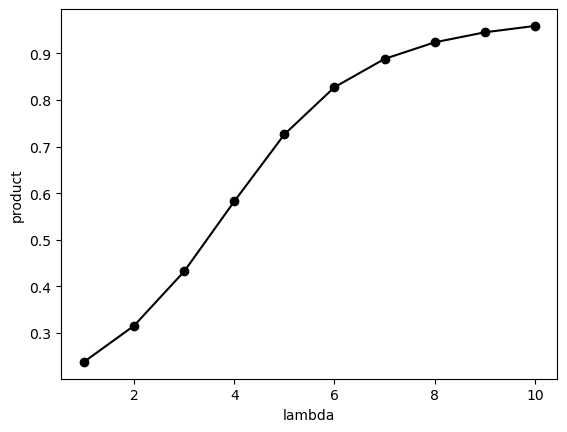

In [109]:
if __name__ == '__main__':
    np.random.seed(2022)
    E = np.random.normal(size=(10,10))
    v = np.array([1]+[0]*9)
    lams = np.arange(1, 11)
    prods = []
    for lam in lams:
        X = lam*np.outer(v,v) + E
        v0 = np.ones(10)
        v0 = v0/np.linalg.norm(v0,2)
        vv = power_iteration(X, v0) 
        prods.append(np.abs(v @ vv))
        
    plt.plot(lams, prods, '-ok')
    plt.xlabel('lambda')
    plt.ylabel('product')
    plt.show()


# Problem 5 

In [3]:
# From lecture note: https://en.wikipedia.org/wiki/Fast_Walsh–Hadamard_transform
@jit
def fwht(a) -> None:
    """In-place Fast Walsh–Hadamard Transform of array a."""
    h = 1
    while h < len(a):
        # perform FWHT
        for i in range(0, len(a), h * 2):
            for j in range(i, i + h):
                x = a[j]
                y = a[j + h]
                a[j] = x + y
                a[j + h] = x - y
        # normalize and increment
        a /= math.sqrt(2)
        h *= 2

In [5]:
class SketchedLeastSquare():
    '''
    Least Square Using Sketching Methods.
    The order is DX->HDX->S'HDX.
    '''

    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.Transform()

    def Transform(self):
        '''Store the results of HDX and HDY.'''
        # Compute DX and DY. Since D is diagonal, we just perform matrix broadcast instead of multiplication. 

        # Step 5
        self.D = (2 * np.round(np.random.rand(self.n), 0) - 1).reshape(-1, 1)

        #step 4
        X_1 = self.D * self.X
        Y_1 = self.D * self.Y
        
        # Perform Fast Walsh–Hadamard Transform on DX/DY instead of D.
        # Time complexity is therefore O(d*n*log(n)) otherwise it would be O(n^2*log(n)).
        # Hence d=20, n=1048576 it is incridibale to doing this.
        # May run out time if just using D
        # Then divided by 1/sqrt(n) for normalization.

        self.fwht(X_1)
        self.fwht(Y_1)

        self.HDX = X_1 / np.sqrt(self.n)
        self.HDY = Y_1 / np.sqrt(self.n)

    def select(self, epsilon):
        '''S^T*A is equivalent to pick A's rows, corresponds to step 3 '''
        r = np.round(self.d * np.log(self.n) / epsilon, 0).astype("int") # step 1 
        selected = np.random.choice(range(self.n), size=r, replace=True) # select uniformly at random an integer from {1, 2, . . . , n}
        X1 = np.zeros((r, self.d))
        Y1 = np.zeros((r, 1))
        for i in range(len(selected)):
            X1[i] = self.HDX[selected[i]]
            Y1[i] = self.HDY[selected[i]]
        X1 = np.sqrt(self.n / r) * X1
        Y1 = np.sqrt(self.n / r) * Y1
        return X1, Y1

    @staticmethod
    def fwht(a) -> None:
        """
        Fast Walsh–Hadamard Transform .
        """
        h = 1
        while h < len(a):
            for i in range(0, len(a), h * 2):
                for j in range(i, i + h):
                    a[j], a[j + h] = a[j] + a[j + h], a[j] - a[j + h]
            h *= 2

    @staticmethod
    def OLS(A, B):
        '''Compute time for OLS'''
        start_ols = time.time()
        b = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(B)
        end_ols = time.time()
        return b, end_ols - start_ols


    def sketched_OLS(self, epsilon):
        """
        Runs the sketch (select), then solves the small OLS:
            b_s = (X₁ᵀ X₁)⁻¹ X₁ᵀ Y₁
        Returns (b_s, time_taken).
        """
        # 1) build the sketched system
        Xs, Ys = self.select(epsilon)

        # 2) time the small OLS
        t0 = time.time()
        b_s = np.linalg.inv(Xs.T.dot(Xs)).dot(Xs.T).dot(Ys)
        t1 = time.time()

        return b_s, (t1 - t0)



## (b)

In [14]:
n = 1048576
p = 20
np.random.seed(2022)
X = np.random.rand(n, p)
y = np.random.rand(n, 1)


## (c)

In [23]:
def problem5_c(X, y, epsilons=(0.1, 0.05, 0.01, 0.001)):
    # Full OLS
    t0 = time.time()
    _ = np.linalg.inv(X.T @ X) @ (X.T @ y)
    t_full = time.time() - t0

    sls = SketchedLeastSquare(X, y)

    method_labels = []
    runtimes = []

    for eps in epsilons:
        Xs, ys = sls.select(eps)
        t0 = time.time()
        _ = np.linalg.inv(Xs.T @ Xs) @ (Xs.T @ ys)
        t_sketch = time.time() - t0

        method_labels.append(f"$\\epsilon={eps}$")
        runtimes.append(t_sketch)

    # Add OLS row
    method_labels.append("OLS")
    runtimes.append(t_full)

    df = pd.DataFrame({
        "method list": method_labels,
        "Running Time": runtimes
    })

    return df


In [25]:
df = problem5_c(X, y)             
print(df.to_string(index=False)) 

     method list  Running Time
  $\epsilon=0.1$      0.000838
 $\epsilon=0.05$      0.002247
 $\epsilon=0.01$      0.002615
$\epsilon=0.001$      0.033833
             OLS      0.081140
